#### COMP257 Final Project - Face Recognition Unsupervised Learning
#### Section 004 - Group 2

Your team has been approached by a law enforcement security company ABC that would like to incorporate facial recognition and identification into their system. ABC has provided your team with the umist_cropped.mat dataset to train your system

In [129]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import layers
from scipy.io import loadmat

In [130]:
#load the dataset using scipy loadmat
data_load = loadmat('/Users/shrikantkale/Downloads/umist_cropped.mat')

data = data_load['facedat']

In [131]:
data_set = data[0]

#Checking total number of images for each person
total = 0
for i in range(len(data_set)):
    print(f'Person {i+1} Images-> {data_set[i].shape[2]}')
    temp = data_set[i].shape[2]
    total = total+temp
print("Total images in dataset:", total)

Person 1 Images-> 38
Person 2 Images-> 35
Person 3 Images-> 26
Person 4 Images-> 24
Person 5 Images-> 26
Person 6 Images-> 23
Person 7 Images-> 19
Person 8 Images-> 22
Person 9 Images-> 20
Person 10 Images-> 32
Person 11 Images-> 34
Person 12 Images-> 34
Person 13 Images-> 26
Person 14 Images-> 30
Person 15 Images-> 19
Person 16 Images-> 26
Person 17 Images-> 26
Person 18 Images-> 33
Person 19 Images-> 48
Person 20 Images-> 34
Total images in dataset: 575


We can observe that the dataset is imbalanced as it has different number of images for each person 

### Testing Autoencoder to generate more images for One person in the dataset

In [132]:
person8 = data[0][7]   ## this is the image of a[0][7] == person 8 

#preprocessing
person8  = person8/255
temp = person8.reshape(10304,22)
person8_flat = temp.T #mad one line image 

encoding_dim = 64

In [133]:
#Encoder
input_img = keras.Input(shape = (10304,))
encoded = layers.Dense(3000, activation = 'relu')(input_img)
encoded = layers.Dense(1000, activation = 'relu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)

#Decoder
decoded = layers.Dense(1000, activation='relu')(encoded)
decoded = layers.Dense(3000, activation='relu')(decoded)
decoded = layers.Dense(10304, activation='sigmoid')(decoded)


#generative model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),loss = 'binary_crossentropy')

autoencoder.fit(person8_flat, person8_flat, epochs = 20,
                batch_size = 20, 
                shuffle = True)

person8_enc = autoencoder.predict(person8_flat)

Epoch 1/20


2022-12-14 11:53:04.437860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 20s 3s/step - loss: 0.8372
Epoch 2/20
2/2 [==============================] - 1s 95ms/step - loss: 3.7147
Epoch 3/20
2/2 [==============================] - 0s 79ms/step - loss: 0.6849
Epoch 4/20
2/2 [==============================] - 1s 85ms/step - loss: 0.7397
Epoch 5/20
2/2 [==============================] - 0s 82ms/step - loss: 0.6827
Epoch 6/20
2/2 [==============================] - 0s 79ms/step - loss: 0.6801
Epoch 7/20
2/2 [==============================] - 0s 71ms/step - loss: 0.6570
Epoch 8/20
2/2 [==============================] - 0s 78ms/step - loss: 0.6253
Epoch 9/20
2/2 [==============================] - 3s 118ms/step - loss: 0.6171
Epoch 10/20
2/2 [==============================] - 0s 92ms/step - loss: 0.6296
Epoch 11/20
2/2 [==============================] - 0s 77ms/step - loss: 0.6184
Epoch 12/20
2/2 [==============================] - 1s 707ms/step - loss: 0.6139
Epoch 13/20
2/2 [==============================] - 0s 79ms/step - loss:

2022-12-14 11:53:29.286690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 792ms/step


Plotting Original and Recontructed Images for Person 8

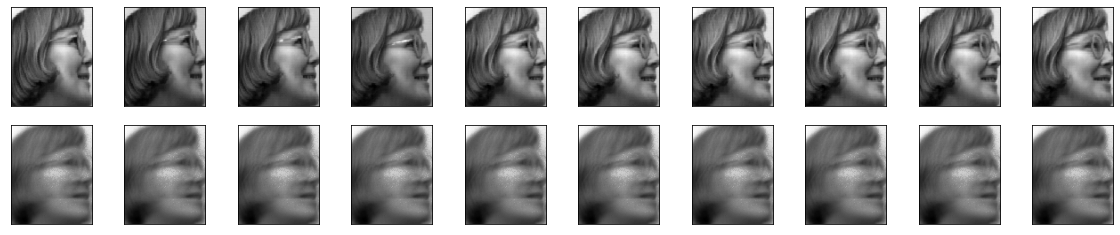

In [134]:
import matplotlib.pyplot as plt

n = 10  # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(person8_flat[i].reshape(112,92))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(person8_enc[i].reshape(112,92))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Using Autoencoder to Generate Reconstructed Images for all people in the dataset to create 48 samples (highest in the dataset) for all people

In [135]:
#empty data array to append all images 
data_array = np.empty((1,10304))

for i in range(20):
    per = data[0][i]
    per = per/255
    
    total_per = per.shape[2] # taking total number of images for each person
    
    #Flatten data
    temp = per.reshape(10304, total_per)
    per_flat = temp.T
    
    encoding_dim = 64 
    
    #Encoder
    #This is out input image
    input_img = keras.Input(shape = (10304,))
    encoded = layers.Dense(300, activation = 'relu')(input_img)
    encoded = layers.Dense(100, activation = 'relu')(encoded)
    encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)

    #Decoder
    decoded = layers.Dense(100, activation='relu')(encoded)
    decoded = layers.Dense(300, activation='relu')(decoded)
    decoded = layers.Dense(10304, activation='sigmoid')(decoded)

## This model will map an input to its reconstruction

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),loss = 'binary_crossentropy')

    autoencoder.fit(per_flat, per_flat, epochs = 20,
                batch_size = 16, 
                shuffle = True, verbose =0)
    
    data_concat = np.empty((1,10304))
    
    #Reconstructed Images are generated only for Person class with less than 48 Images
    while total_per < 48:
        per_enc = autoencoder.predict(per_flat)
        data_concat = np.concatenate((data_concat, per_enc), axis = 0)
        total_per += per_enc.shape[0]
        print(total_per)


    data_concat = data_concat[1:, :]
    data_array = np.concatenate((data_array, per_flat), axis =0)
    data_array = np.concatenate((data_array, data_concat[:48-per_flat.shape[0],:]), axis =0)
    
data_array = data_array[1:, :]

2022-12-14 11:54:30.551682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:55:00.573078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 681ms/step
76


2022-12-14 11:55:04.113627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2022-12-14 11:55:09.195390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 200ms/step
70


2022-12-14 11:55:10.216474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:55:14.966961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 522ms/step
52


2022-12-14 11:55:16.287587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:55:22.203931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 576ms/step
48


2022-12-14 11:55:23.953305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:55:43.533920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
52


2022-12-14 11:55:45.156634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:56:10.901354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
46
1/1 [==============================] - 0s 22ms/step
69


2022-12-14 11:56:12.838115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 123ms/step
38
1/1 [==============================] - 0s 15ms/step


2022-12-14 11:56:14.543389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57


2022-12-14 11:56:15.176218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 109ms/step
44
1/1 [==============================] - 0s 15ms/step


2022-12-14 11:56:16.264240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66


2022-12-14 11:56:16.993453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 107ms/step
40
1/1 [==============================] - 0s 15ms/step


2022-12-14 11:56:18.401109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


60


2022-12-14 11:56:18.927864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 268ms/step


2022-12-14 11:56:20.120824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64


2022-12-14 11:56:43.227457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 45ms/step


2022-12-14 11:56:46.471526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68


2022-12-14 11:56:47.308661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:56:57.364885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step
68


2022-12-14 11:57:02.821667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:57:16.554997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 294ms/step
52


2022-12-14 11:57:18.213276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:57:24.185354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
60


2022-12-14 11:57:27.320822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:57:39.361361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
38
1/1 [==============================] - 0s 338ms/step
57


2022-12-14 11:57:43.632735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:57:54.549677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 939ms/step
52


2022-12-14 11:57:56.986790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:58:12.550648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 935ms/step
52


2022-12-14 11:58:17.177935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 40ms/step


2022-12-14 11:58:20.902510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66


2022-12-14 11:58:22.131177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:58:25.992277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 11:58:29.851860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 557ms/step
68


In [136]:
#printing the shape of the generated dataset
print(data_array.shape)

(960, 10304)


In [137]:
#Autoencoder model summary
autoencoder.summary()

Model: "model_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_118 (InputLayer)      [(None, 10304)]           0         
                                                                 
 dense_609 (Dense)           (None, 300)               3091500   
                                                                 
 dense_610 (Dense)           (None, 100)               30100     
                                                                 
 dense_611 (Dense)           (None, 64)                6464      
                                                                 
 dense_612 (Dense)           (None, 100)               6500      
                                                                 
 dense_613 (Dense)           (None, 300)               30300     
                                                                 
 dense_614 (Dense)           (None, 10304)             310

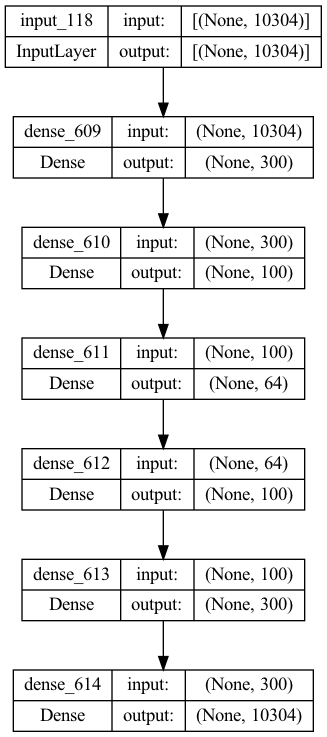

In [138]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(autoencoder, show_shapes=True, show_layer_names=True)

### Creating Training, Validation and Testing Set using the Dataset with Stratified Sampling

Total Images = 48 per person (Total (48 x 20)= 960)

Train set - 30 Images per Person (Total (30 x 20) = 600)

Validation Set - 9 Images per person (Total (9 x 20) = 180)

Testing Set - 9 Images per person (Total (9 x 20) = 180)

In [139]:
train_data = np.empty((1, 10304))
val_data = np.empty((1, 10304))
test_data = np.empty((1, 10304))

start = 0 
end = 48

while end < 961:
    main_data = data_array[start:end, :]
    main_data = np.take(main_data ,np.random.permutation(main_data.shape[0]),axis=0,out=main_data)

    train_data = np.concatenate((train_data,main_data[:30,:]), axis=0)
    val_data = np.concatenate((val_data,main_data[30:39,:]), axis=0)
    test_data = np.concatenate((test_data,main_data[39:48,:]), axis=0)
    
    start += 48
    end += 48
    
train_data = train_data[1:,:]
val_data = val_data[1:,:]
test_data = test_data[1:,:]


print(f'Shape of training dataset: {train_data.shape}')
print(f'Shape of validation dataset: {val_data.shape}')
print(f'Shape of test dataset: {test_data.shape}')

Shape of training dataset: (600, 10304)
Shape of validation dataset: (180, 10304)
Shape of test dataset: (180, 10304)


Shuffling data so that it is not in sequential order

In [140]:
train_shuffle_data = np.take(train_data ,np.random.permutation(train_data.shape[0]),axis=0,out=train_data)
val_shuffle_data = np.take(val_data ,np.random.permutation(val_data.shape[0]),axis=0,out=val_data)
test_shuffle_data = np.take(test_data ,np.random.permutation(test_data.shape[0]),axis=0,out=test_data)

Plotting images generated in the dataset

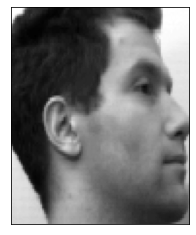

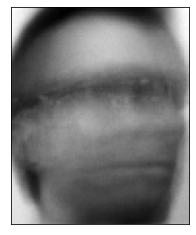

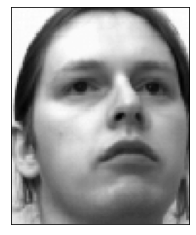

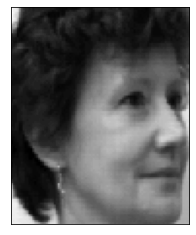

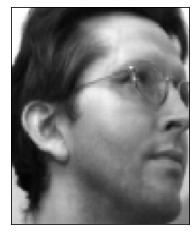

In [141]:
for i in range(1,6):
    plt.imshow(train_shuffle_data[i:i+1,:].reshape((112,92)))
    plt.xticks([])
    plt.yticks([])
    plt.show()

Using PCA for dimesnionality reduction preserving 99 % of the variance

In [142]:
from sklearn.decomposition import PCA
pca = PCA(0.99) # create a PCA object that ensures 99% variance

pca.fit(train_shuffle_data)

train_pca = pca.transform(train_shuffle_data)
val_pca = pca.transform(val_shuffle_data)
test_pca = pca.transform(test_shuffle_data)

print("Dimension of training data after reducing dimension: ", train_pca.shape)
print("Dimension of validation data after reducing dimension: ", val_pca.shape)
print("Dimension of testing data after reducing dimension: ", test_pca.shape)



Dimension of training data after reducing dimension:  (600, 216)
Dimension of validation data after reducing dimension:  (180, 216)
Dimension of testing data after reducing dimension:  (180, 216)


### Clustering the data to get all images of a person in one cluster

#### 1. K-Means clustering

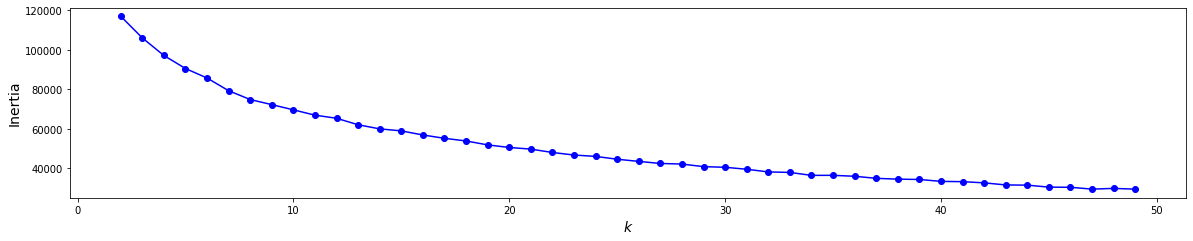

In [143]:
#Using Elbow Method to determine the optimal number of clusters for KMeans

from sklearn.cluster import KMeans
inertias = []
for k in range(2,50):
    km = KMeans(n_clusters=k)
    km.fit(train_pca)
    inertias.append(km.inertia_)

#Plotting cluster and intertia
plt.figure(figsize=(20, 3.5))
plt.plot(range(2, 50), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Choosing 20 as the optimal number of clusters based on elbow plot

In [144]:
#Applying K-means clustering to the dataset
kmeans = KMeans(n_clusters=20, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(train_pca)

kmeans_labels = kmeans.labels_

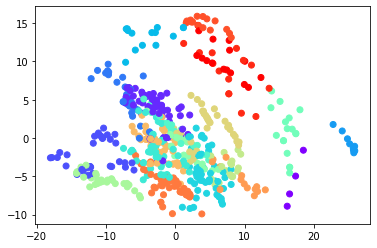

In [145]:
#Plotting the first two dimensions -> we see the distribution of clusters
plt.scatter(train_pca[:,0],train_pca[:,1], c=kmeans.labels_, cmap='rainbow')

2. Agglomerative Hirarchical Clustering

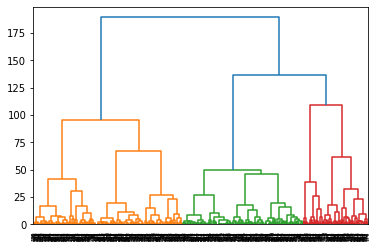

In [146]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#Creating dendogram to determine the number of clusters
dnd = sch.dendrogram(sch.linkage(train_pca[:, 0:2], method='ward'))


In [147]:
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, 
                                  distance_threshold=51)

In [148]:
# Cluster the data
cluster.fit_predict(train_pca)

agg_labels = cluster.labels_

print("Number of clusters determined by Agglomerative clustering:", max(agg_labels) + 1 )

Number of clusters determined by Agglomerative clustering: 21


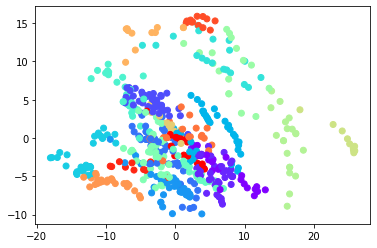

In [149]:
#Plotting the distribution of clusters determined by the agglomerative clustering
plt.scatter(train_pca[:,0],train_pca[:,1], c=agg_labels, cmap='rainbow')
plt.show()

#### 3. Gaussian Mixture Clustering

In [150]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(20, covariance_type='full', random_state=0)
gmm.fit(train_pca[:, 0:2])

GaussianMixture(n_components=20, random_state=0)

Plotting the distribution of 2-D training data 

/var/folders/w6/m66pmgl14m361lspq9r_rtkw0000gn/T/ipykernel_95280/3757390012.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


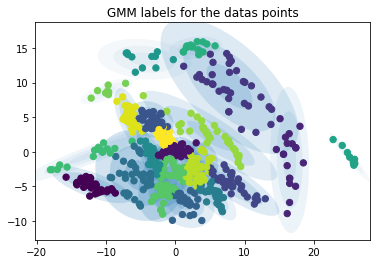

In [151]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        
    ax.axis('equal')
    plt.title('GMM labels for the datas points')    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)



plot_gmm(gmm, train_pca[:, 0:2])

Out of the three clustering techniques, we have chosen GMM as we can see that the dataset is fitting to the ellipsodial shape instead of centering to cluster. 

Also after further experimentation, we get same number of labels in all 20 clusters using GMM. 

#### Appling GMM clustering to the data

In [152]:
#Fitting on train_pca  
gmm = GaussianMixture(20, covariance_type='full', random_state=2)
gmm.fit(train_pca)

#training labels
train_labels = gmm.predict(train_pca)

#validation labels
val_labels= gmm.predict(val_pca)

#testing labels
test_labels= gmm.predict(test_pca)

Creating a ANN classifier to predict the labels

In [153]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV

In [154]:
model = models.Sequential([
    keras.Input(shape=(train_pca.shape[1],)),
    layers.Dense(2000, activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(1000, activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(20, activation='softmax')
    ])

In [155]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
model.fit(train_pca, train_labels, epochs=10, validation_data = (val_pca,val_labels))

Epoch 1/10


2022-12-14 12:02:26.016005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.8100

2022-12-14 12:02:56.647736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 42s 1s/step - loss: 0.8187 - accuracy: 0.8100 - val_loss: 0.2415 - val_accuracy: 0.9167
Epoch 2/10
19/19 [==============================] - 7s 350ms/step - loss: 0.0763 - accuracy: 0.9750 - val_loss: 0.1987 - val_accuracy: 0.9444
Epoch 3/10
19/19 [==============================] - 2s 121ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.2328 - val_accuracy: 0.9389
Epoch 4/10
19/19 [==============================] - 0s 19ms/step - loss: 0.0291 - accuracy: 0.9933 - val_loss: 0.1804 - val_accuracy: 0.9444
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0144 - accuracy: 0.9933 - val_loss: 0.1381 - val_accuracy: 0.9556
Epoch 6/10
19/19 [==============================] - 1s 53ms/step - loss: 0.0313 - accuracy: 0.9933 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 7/10
19/19 [==============================] - 1s 36ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.1651 - val_accuracy: 0.9500
Epoch 8/10
19/19 [=====

In [157]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_615 (Dense)           (None, 2000)              434000    
                                                                 
 dense_616 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_617 (Dense)           (None, 20)                20020     
                                                                 
Total params: 2,455,020
Trainable params: 2,455,020
Non-trainable params: 0
_________________________________________________________________


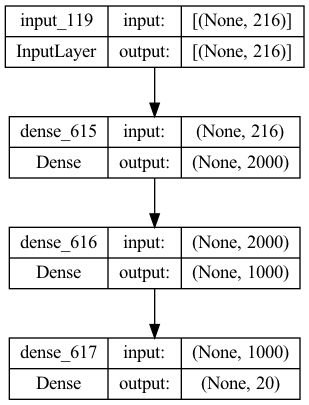

In [158]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [159]:
model.evaluate(test_pca, test_labels)

6/6 [==============================] - 5s 580ms/step - loss: 0.2538 - accuracy: 0.9444


[0.2537834346294403, 0.944444477558136]

Model Evaluation

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Predicting on Test data
y_pred = model.predict(test_pca)

for i in range(y_pred.shape[0]):
    y_pred[i] = y_pred[i].argmax()
    
y_pred = y_pred[:,:1]
    
#Accuracy
print("Model accuracy score is: ", accuracy_score(y_pred,test_labels ))
print("Model precision is:", precision_score(y_pred, test_labels,average='weighted'))
print("Model recall score is:", recall_score(y_pred, test_labels,average='weighted'))


2022-12-14 12:03:58.463820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 23s 2s/step
Model accuracy score is:  0.9444444444444444
Model precision is: 0.9493832040208852
Model recall score is: 0.9444444444444444


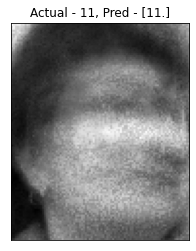

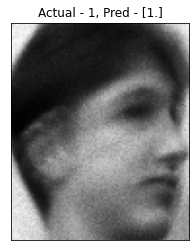

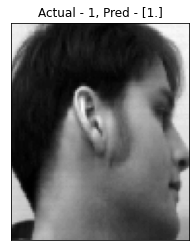

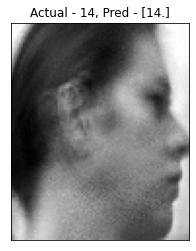

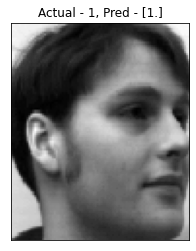

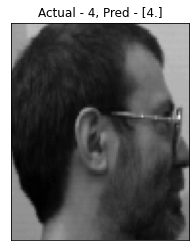

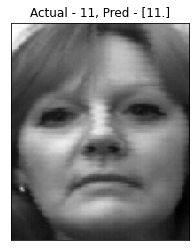

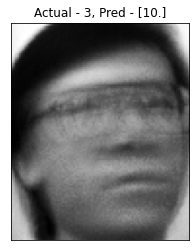

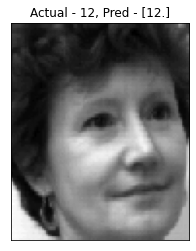

In [161]:
#Plotting predictions 
for i in range(1,10):
    plt.imshow(test_shuffle_data[i:i+1,:].reshape((112,92)))
    plt.title(f'Actual - {test_labels[i]}, Pred - {y_pred[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.show()